In [1]:
%%capture
!pip install geedim  # the needed dependencies
!pip install geojson
!pip install geemap
!pip install rasterio

In [2]:
import os.path
out_dir = os.path.expanduser('~/Downloads')
import zipfile
import os # we import hte necessary packages

# Import necessary modules
import geemap
import ee
import numpy as np
import rasterio # here we want to plot the data we received
import matplotlib.pyplot as plt
from geopy import distance
import copy

In [3]:
ee.Authenticate() # we authenticate
# and intialize geemap
ee.Initialize(project='ee-encodersmap1')

In [4]:
from google.colab import drive # we mount the drive for later downloading of the files
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
satellite_ImageCollection_dict = {'GMTED2010: Global Multi-resolution Terrain Elevation Data 2010':"USGS/GMTED2010"}

folder_names = ['Elevation']

satellite_ImageCollection_list = ['GMTED2010: Global Multi-resolution Terrain Elevation Data 2010']

nameOfBands=['be75']


# Define the region of interest (ROI) over Europe
roiComputed = ee.Geometry.Polygon(
    [[[-12.15, 31.8],
      [36.15, 31.8],
      [36.15, 72.15],
      [-12.15, 72.15]]]
)

In [6]:
from collections import namedtuple, defaultdict

# Define the named tuple to represent the object
# we combe the image collectino to the list of bands we want
Object = namedtuple('Satellites', ['nameImageCollection', 'unordered_list_bands'])

# Create an instance of the object
my_object = Object(nameImageCollection='Image Collection Name', unordered_list_bands=defaultdict(list))

# Add items to the unordered list

# we append it here
for i in range(len(satellite_ImageCollection_list)):
    my_object.unordered_list_bands[satellite_ImageCollection_dict[satellite_ImageCollection_list[i]]].append(nameOfBands[i])

# Print the object
print(my_object)

Satellites(nameImageCollection='Image Collection Name', unordered_list_bands=defaultdict(<class 'list'>, {'USGS/GMTED2010': ['be75']}))


In [7]:
band_name = nameOfBands[0]

collection_name = list(my_object.unordered_list_bands.keys())[0] # getting the collection name

folder_path = folder_names[0]

collection = ee.ImageCollection(collection_name).select(band_name)
image = ee.Image(collection_name)
# Get the ID of the image

image_id = image.id().getInfo()


/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for USGS/GMTED2010! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/USGS_GMTED2010

  warnings.warn(warning, category=DeprecationWarning)


In [8]:

  # Filter the image collection based on the ROI
# Split the ID to extract the name
output_path = folder_path

#nominal scale
nominal_scale = image.projection().nominalScale().getInfo()
#grid
grid = geemap.create_grid(roiComputed, 2e5)

# Loop through the tiles of the grid
print(((grid.getInfo())['features'][0])['geometry']['coordinates'])


grid_features_list = copy.deepcopy((grid.getInfo())['features'])

names_of_images = []



for i in range(len(grid_features_list)):
    coordinates = (grid_features_list[i])['geometry']['coordinates'][0]

    north_latitude = max(coord[1] for coord in coordinates)
    south_latitude = min(coord[1] for coord in coordinates)
    west_longitude = min(coord[0] for coord in coordinates)
    east_longitude = max(coord[0] for coord in coordinates)

    name_ofImage = 'N'+str(north_latitude).replace('.', '_')+'S'+str(south_latitude).replace('.', '_')+'W'+str(west_longitude).replace('.', '_')+'E'+str(east_longitude).replace('.', '_')
    names_of_images.append(name_ofImage)

    north_latitude += 0.1
    south_latitude -= 0.1
    west_longitude -= 0.15
    east_longitude += 0.15

    modified_coordinates = [[west_longitude,south_latitude],[east_longitude,south_latitude],[east_longitude,north_latitude],[west_longitude,north_latitude],[west_longitude,south_latitude]]
    updated_dict = {'coordinates': [modified_coordinates]}
    grid_features_list[i]['geometry'].update(updated_dict)



[[[-12.576413977673301, 30.542719660063728], [-10.779783409434257, 30.542719660063728], [-10.779783409434257, 32.33935022830277], [-12.576413977673301, 32.33935022830277], [-12.576413977673301, 30.542719660063728]]]


In [9]:
Map = geemap.Map()
# Create a FeatureCollection from the list of features
feature_collection = ee.FeatureCollection(grid_features_list)

Map.addLayer(feature_collection)
# Plot the feature on an interactive map


Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [10]:
geemap.download_ee_image_tiles(image,feature_collection, output_path, scale =nominal_scale)

001.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

002.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

003.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

004.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

005.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

006.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

007.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

008.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

009.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

010.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

011.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

012.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

013.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

014.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

015.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

016.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

017.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

018.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

019.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

020.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

021.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

022.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

023.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

024.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

025.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

026.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

027.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

028.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

029.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

030.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

031.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

032.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

033.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

034.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

035.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

036.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

037.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

038.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

039.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

040.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

041.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

042.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

043.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

044.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

045.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

046.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

047.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

048.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

049.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

050.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

051.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

052.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

053.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

054.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

055.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

056.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

057.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

058.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

059.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

060.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

061.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

062.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

063.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

064.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

065.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

066.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

067.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

068.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

069.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

070.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

071.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

072.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

073.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

074.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

075.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

076.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

077.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

078.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

079.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

080.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

081.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

082.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

083.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

084.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

085.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

086.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

087.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

088.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

089.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

090.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

091.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

092.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

093.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

094.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

095.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

096.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

097.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

098.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

099.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

100.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

101.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

102.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

103.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

104.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

105.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

106.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

107.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

108.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

109.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

110.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

111.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

112.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

113.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

114.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

115.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

116.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

117.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

118.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

119.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

120.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

121.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

122.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

123.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

124.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

125.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

126.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

127.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

128.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

129.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

130.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

131.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

132.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

133.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

134.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

135.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

136.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

137.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

138.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

139.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

140.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

141.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

142.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

143.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

144.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

145.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

146.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

147.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

148.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

149.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

150.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

151.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

152.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

153.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

154.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

155.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

156.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

157.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

158.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

159.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

160.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

161.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

162.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

163.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

164.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

165.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

166.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

167.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

168.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

169.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

170.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

171.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

172.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

173.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

174.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

175.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

176.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

177.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

178.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

179.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

180.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

181.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

182.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

183.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

184.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

185.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

186.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

187.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

188.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

189.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

190.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

191.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

192.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

193.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

194.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

195.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

196.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

197.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

198.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

199.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

200.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

201.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

202.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

203.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

204.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

205.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

206.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

207.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

208.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

209.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

210.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

211.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

212.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

213.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

214.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

215.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

216.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

217.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

218.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

219.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

220.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

221.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

222.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

223.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

224.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

225.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

226.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

227.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

228.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

229.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

230.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

231.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

232.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

233.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

234.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

235.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

236.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

237.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

238.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

239.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

240.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

241.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

242.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

243.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

244.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

245.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

246.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

247.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

248.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

249.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

250.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

251.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

252.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

253.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

254.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

255.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

256.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

257.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

258.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

259.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

260.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

261.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

262.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

263.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

264.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

265.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

266.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

267.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

268.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

269.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

270.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

271.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

272.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

273.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

274.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

275.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

276.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

277.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

278.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

279.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

280.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

281.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

282.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

283.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

284.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

285.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

286.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

287.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

288.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

289.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

290.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

291.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

292.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

293.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

294.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

295.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

296.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

297.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

298.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

299.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

300.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

301.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

302.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

303.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

304.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

305.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

306.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

307.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

308.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

309.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

310.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

311.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

312.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

313.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

314.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

315.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

316.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

317.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

318.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

319.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

320.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

321.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

322.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

323.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

324.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

325.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

326.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

327.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

328.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

329.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

330.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

331.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

332.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

333.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

334.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

335.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

336.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

337.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

338.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

339.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

340.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

341.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

342.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

343.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

344.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

345.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

346.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

347.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

348.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

349.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

350.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

351.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

352.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

353.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

354.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

355.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

356.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

357.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

358.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

359.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

360.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

361.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

362.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

363.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

364.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

365.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

366.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

367.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

368.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

369.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

370.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

371.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

372.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

373.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

374.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

375.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

376.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

377.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

378.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

379.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

380.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

381.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

382.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

383.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

384.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

385.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

386.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

387.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

388.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

389.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

390.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

391.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

392.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

393.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

394.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

395.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

396.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

397.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

398.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

399.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

400.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

401.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

402.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

403.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

404.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

405.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

406.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

407.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

408.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

409.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

410.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

411.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

412.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

413.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

414.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

415.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

416.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

417.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

418.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

419.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

420.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

421.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

422.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

423.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

424.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

425.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

426.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

427.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

428.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

429.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

430.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

431.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

432.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

433.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

434.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

435.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

436.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

437.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

438.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

439.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

440.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

441.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

442.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

443.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

444.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

445.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

446.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

447.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

448.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

449.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

450.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

451.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

452.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

453.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

454.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

455.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

456.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

457.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

458.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

459.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

460.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

461.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

462.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

463.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

464.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

465.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

466.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

467.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

468.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

469.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

470.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

471.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

472.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

473.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

474.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

475.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

476.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

477.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

478.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

479.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

480.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

481.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

482.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

483.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

484.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

485.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

486.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

487.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

488.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

489.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

490.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

491.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

492.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

493.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

494.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

495.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

496.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

497.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

498.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

499.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

500.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

501.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

502.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

503.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

504.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

505.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

506.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

507.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

508.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

509.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

510.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

511.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

512.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

513.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

514.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

515.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

516.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

517.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

518.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

519.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

520.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

521.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

522.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

523.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

524.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

525.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

526.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

527.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

528.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

529.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

530.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

531.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

532.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

533.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

534.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

535.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

536.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

537.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

538.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

539.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

540.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

541.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

542.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

543.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

544.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

545.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

546.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

547.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

548.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

549.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

550.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

551.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

552.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

553.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

554.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

555.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

556.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

557.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

558.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

559.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

560.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

561.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

562.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

563.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

564.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

565.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

566.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

567.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

568.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

569.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

570.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

571.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

572.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

573.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

574.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

575.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

576.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

577.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

578.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

579.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

580.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

581.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

582.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

583.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

584.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

585.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

586.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

587.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

588.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

589.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

590.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

591.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

592.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

593.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

594.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

595.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

596.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

597.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

598.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

599.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

600.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

601.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

602.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

603.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

604.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

605.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

606.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

607.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

608.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

609.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

610.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

611.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

612.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

613.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

614.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

615.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

616.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

617.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

618.tif: |          | 0.00/1.94M (raw) [  0.0%] in 00:00 (eta:     ?)

619.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

620.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

621.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

622.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

623.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

624.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

625.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

626.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

627.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

628.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

629.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

630.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

631.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

632.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

633.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

634.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

635.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

636.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

637.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

638.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

639.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

640.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

641.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

642.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

643.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

644.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

645.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

646.tif: |          | 0.00/1.93M (raw) [  0.0%] in 00:00 (eta:     ?)

Downloaded 646 tiles in 1598.108417749405 seconds.


In [11]:
def is_int(string):
    try:
        int(string)
        return True
    except ValueError:
        return False


In [12]:

def rename_tif_files(directory):
    count = 0
    for file_name in os.listdir(directory):
        if file_name.endswith('.tif'):
            file_path = os.path.join(directory, file_name)
            combined_string = get_combined_string(file_path) # getting new name
            new_file_name = 'ID'+str(count)+combined_string + '.tif' # renaming the file
            new_file_path = os.path.join(directory, new_file_name)
            print(f"Renamed {file_name} to {new_file_name}")
            os.rename(file_path, new_file_path)
            count += 1 # counting the ID of the gile

def get_combined_string(tif_file):
    with rasterio.open(tif_file) as src:

        bounds = src.bounds
        bounds_right = bounds.right
        bounds_left = bounds.left
        bounds_top = bounds.top
        bounds_bottom = bounds.bottom

              # Ensure bounds.top > bounds.bottom
        if bounds_top <  bounds_bottom:
            bounds_top,  bounds_bottom =  bounds_bottom, bounds_top

        # Ensure bounds.right > bounds.left
        if  bounds_right <  bounds_left:
             bounds_right,  bounds_left =  bounds_left, bounds_right

        bounds_top -= 0.1
        bounds_bottom += 0.1
        bounds_right -= 0.15
        bounds_left += 0.15


        right_string = str(float( bounds_right)).replace('.', '_')
        left_string = str(float(bounds_left)).replace('.', '_')
        top_string = str(float(bounds_top)).replace('.', '_')
        bottom_string = str(float( bounds_bottom)).replace('.', '_')
        combined_string = f"N{top_string}S{bottom_string}W{left_string}E{right_string}"
        return combined_string




In [13]:
directory = '/content/Elevation'
rename_tif_files(directory)

Renamed 160.tif to ID0N43_12083333333332S41_320833333333326W17_964583333333326E19_764583333333327.tif
Renamed 046.tif to ID1N35_93333333333332S34_13541666666666W14_372916666666663E16_17083333333333.tif
Renamed 349.tif to ID2N55_69583333333332S53_89791666666665W5_3895833333333325E7_187499999999998.tif
Renamed 524.tif to ID3N66_47708333333333S64_67708333333331W17_964583333333326E19_764583333333327.tif
Renamed 559.tif to ID4N68_27291666666666S66_47499999999998W30_541666666666657E32_33958333333332.tif
Renamed 178.tif to ID5N44_91666666666666S43_11874999999999W-0_002083333333333298E1_7979166666666664.tif
Renamed 387.tif to ID6N57_493749999999984S55_69374999999999W23_35416666666666E25_15416666666666.tif
Renamed 453.tif to ID7N62_88333333333332S61_08541666666665W-8_98333333333333E-7_185416666666665.tif
Renamed 086.tif to ID8N37_73124999999999S35_93124999999999W35_93124999999999E37_731249999999996.tif
Renamed 639.tif to ID9N73_6625S71_86458333333331W23_35416666666666E25_15416666666666.tif
Rena

In [14]:

import re

def extract_number_from_filename(filename):
    pattern = r"^ID(\d+)N"
    match = re.match(pattern, filename)
    if match:
        number = int(match.group(1))
        return number
    else:
        return None

def get_average_bounds(tif_path):
    with rasterio.open(tif_path) as dataset:
        bounds = dataset.bounds
        average_top_bottom = (bounds.top + bounds.bottom) / 2.0
        average_left_right = (bounds.left + bounds.right) / 2.0

    return average_top_bottom, average_left_right


In [15]:
# Specify the directory where the .tif files are located
directory_path = '/content/Elevation/'
tif_files = [filename for filename in os.listdir(directory_path) if filename.endswith(".tif")]

bounds_array = np.empty((len(tif_files), 3), dtype=np.float32)

for i, tif_file in enumerate(tif_files):
    tif_path = os.path.join(directory_path, tif_file)
    average_top_bottom, average_left_right = get_average_bounds(tif_path)
    bounds_array[i, 0] = extract_number_from_filename(tif_file)
    bounds_array[i, 1] = average_top_bottom
    bounds_array[i, 2] = average_left_right

print("Bounds Array:")
print(bounds_array)

# Create the output directory if it doesn't exist
output_directory = "/content/Elevation_Redux"
os.makedirs(output_directory, exist_ok=True)

# Save the bounds_array to an .npy file
output_file = os.path.join(output_directory, "bounds_array.npy")
np.save(output_file, bounds_array)


Bounds Array:
[[506.         42.220833   -8.084375 ]
 [270.         67.373955    4.491667 ]
 [  9.         72.76354    24.254168 ]
 ...
 [539.         58.390625   -6.288542 ]
 [232.         67.373955   27.847918 ]
 [645.         38.628124   -2.6947916]]


In [17]:
import shutil

# Define the folder path
folder_path = '/content/Elevation'  # Update with your folder path
shutil.move(folder_path, output_directory)
# Create a ZIP file
shutil.make_archive('/content/Elevation_Redux', 'zip', output_directory)



'/content/Elevation_Redux.zip'

<open DatasetReader name='/content/Elevation_Redux/Elevation/ID0N43_12083333333332S41_320833333333326W17_964583333333326E19_764583333333327.tif' mode='r'>
Minimum Longitude: 17.814583333333328
Minimum Latitude: 41.220833333333324
Maximum Longitude: 19.914583333333326
Maximum Latitude: 43.220833333333324
436.60993096891536 -5 2674 564.2224242501413


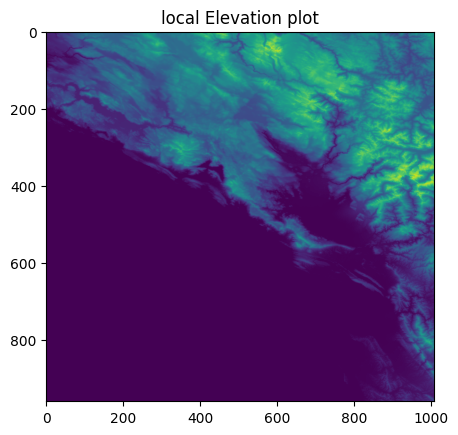

In [19]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file using rasterio
with rasterio.open('/content/Elevation_Redux/Elevation/ID0N43_12083333333332S41_320833333333326W17_964583333333326E19_764583333333327.tif') as src:
 # Read the raster data
    data = src.read(1)  # Read the first band
    print(src)
    # Get information about the raster file
    meta = src.meta
    # Get the bounding box coordinates
    bounds = src.bounds

# Get the minimum and maximum longitude and latitude values
min_longitude, min_latitude, max_longitude, max_latitude = bounds.left, bounds.bottom, bounds.right, bounds.top

# Print the results
print("Minimum Longitude:", min_longitude)
print("Minimum Latitude:", min_latitude)
print("Maximum Longitude:", max_longitude)
print("Maximum Latitude:", max_latitude)


# Plot the raster data
# data = (data-data.mean())/data.std()
# data[data < 0] = data[data > 0].min() - 1
 # we calibrate the data so that it displays significant results
print(data.mean(),data.min(),data.max(),data.std())
plt.imshow(data)
plt.title('local Elevation plot')
plt.show()

In [20]:
source_file_path = '/content/Elevation_Redux.zip'
destination_drive_directory = '/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/'

shutil.move(source_file_path, destination_drive_directory)

'/content/drive/MyDrive/Colab Notebooks/VaesSOC/Data_Files_Redux/TifFilesRaster/Elevation_Redux.zip'

In [ ]:
from google.colab import files

files.download(zip_filename)
